In [2]:
import numpy as np

T1 = np.double(.01)
T2 = np.arange(T1/10, 2*T1, T1/50)
taus = np.arange(T1/10, 10*T1, T1/100)
T1 = np.full(len(T2),T1)
n = 3

p_amp =[]
p_phase =[]
for tau in taus:
    p_amp.append(1-np.exp(-tau/T1))
    p_phase.append(1-np.exp(-(1/T2 - 1/(2*T1))*tau))

# print(p_phase)


found i 


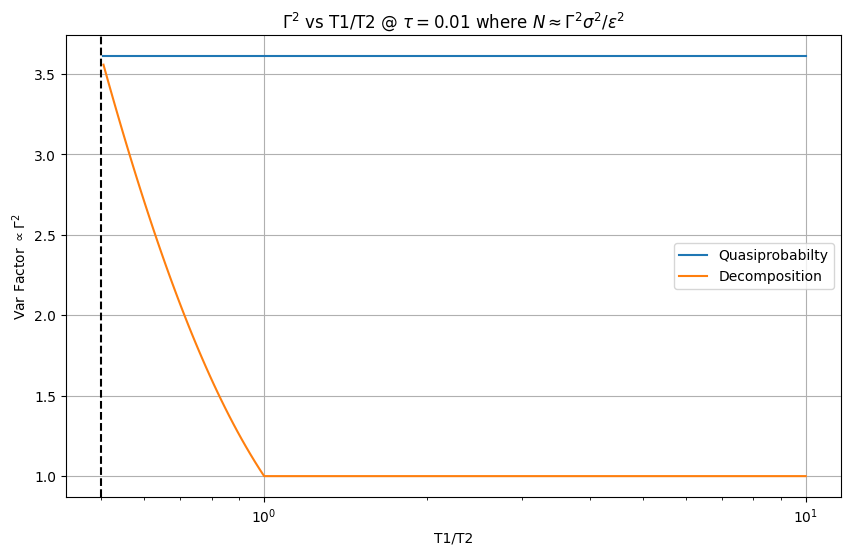

In [3]:
import matplotlib.pyplot as plt

def overhead(q):
    """Calculate overhead Gamma = sum of absolute values."""
    overhead = np.sum(np.abs(q))**n
    return overhead

def generate_pdf(gamma, p):
    c0 = 0.5 * (1.0-gamma+np.sqrt(1.0-gamma))
    c1 = 0.5 * (1.0-gamma-np.sqrt(1.0-gamma))
    c2 = gamma

    c0_tot = (1 - p) * c0 + p * c1
    c1_tot = p * c0 + (1 - p) * c1
    c2_tot = c2

    return np.array([c0, c1, c2]), np.array([c0_tot, c1_tot, c2_tot])

var_curve1 = []
var_curve2 = []

tau_T1_index = 0

for i, tau in enumerate(taus):
    curve1 = []
    curve2 = []
    if(round(tau, 8) == round(T1[0], 8)):
        print("found i ")
        tau_T1_index = i
    for gamma, lam in zip(p_amp[i], p_phase[i]):
        q1, q2 = generate_pdf(gamma, lam/2)
        
        # Normalize to sum 1 (or ensure sum=1)
        # q1 /= np.sum(q1)
        # q2 /= np.sum(q2)
        
        """Find Gamma^2"""
        curve1.append(overhead(q1)**2)
        curve2.append(overhead(q2)**2)
    var_curve1.append(curve1)
    var_curve2.append(curve2)

# Plotting
plt.figure(figsize=(10,6))
plt.axvline(x=.5, color='black', linestyle='--')
plt.plot(np.array(T1)/T2, var_curve1[tau_T1_index], label='Quasiprobabilty')
plt.plot(np.array(T1)/T2, var_curve2[tau_T1_index], label='Decomposition')
plt.xlabel('T1/T2')
plt.xscale('log')
plt.ylabel(rf'Var Factor $\propto \Gamma^2$')
plt.title(rf'$\Gamma^2$ vs T1/T2 @ $\tau={round(taus[tau_T1_index],8)}$ where $N \approx \Gamma^2 \sigma^2 / \epsilon^2$')
plt.legend()
plt.grid(True)
plt.show()


/var/folders/ch/b9nk2s4s0wd77l2b780z9wdh0000gn/T/ipykernel_20211/370245883.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


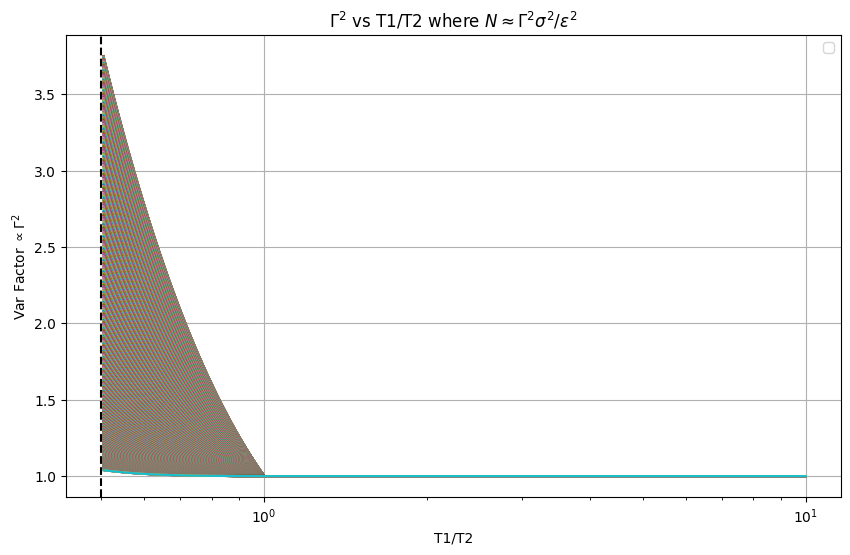

In [4]:
plt.figure(figsize=(10,6))
plt.axvline(x=.5, color='black', linestyle='--')
for curve1, curve2 in zip(var_curve1, var_curve2):
    # plt.plot(np.array(T1)/T2, curve1)#, label='Quasiprobabilty')
    plt.plot(np.array(T1)/T2, curve2)#, label='Decomposition')
plt.xlabel('T1/T2')
plt.xscale('log')
plt.ylabel(rf'Var Factor $\propto \Gamma^2$')
plt.title(rf'$\Gamma^2$ vs T1/T2 where $N \approx \Gamma^2 \sigma^2 / \epsilon^2$')
plt.legend()
plt.grid(True)
plt.show()


1.5624978583844034


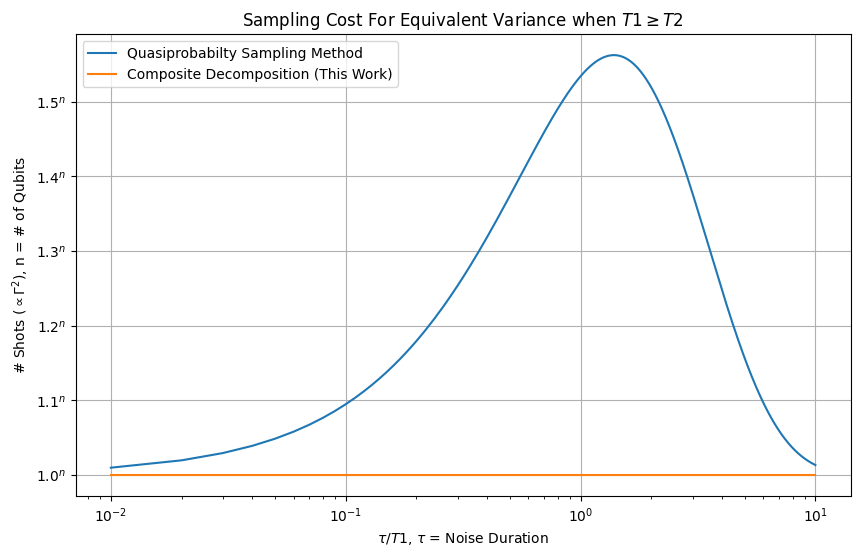

In [5]:
import numpy as np
import matplotlib.pyplot as plt

T1 = .01
T2_taus = T1
taus = np.arange(T1/100, 10*T1, T1/100)
n = 1

p_amp =[]
p_phase =[]
for tau in taus:
    p_amp.append(1-np.exp(-tau/T1))
    p_phase.append(1-np.exp(-(1/T2_taus - 1/(2*T1))*tau))


def overhead(q):
    """Calculate overhead Gamma = sum of absolute values."""
    overhead = np.sum(np.abs(q))**n
    return overhead

def generate_pdf(gamma, p):
    c0 = 0.5 * (1.0-gamma+np.sqrt(1.0-gamma))
    c1 = 0.5 * (1.0-gamma-np.sqrt(1.0-gamma))
    c2 = gamma

    c0_tot = (1 - p) * c0 + p * c1
    c1_tot = p * c0 + (1 - p) * c1
    c2_tot = c2

    return np.array([c0, c1, c2]), np.array([c0_tot, c1_tot, c2_tot])



tau_T1_index = 0

curve1 = []
curve2 = []

for gamma, lam in zip(p_amp, p_phase):
    q1, q2 = generate_pdf(gamma, lam/2)
    
    # Normalize to sum 1 (or ensure sum=1)
    q1 /= np.sum(q1)
    q2 /= np.sum(q2)
    
    """Find Gamma^2"""
    curve1.append(overhead(q1)**2)
    curve2.append(overhead(q2)**2)

peak = np.max(curve1)
print(peak)

# Plotting
# Plotting
plt.figure(figsize=(10,6))
plt.plot(taus/T1, curve1, label='Quasiprobabilty Sampling Method')
plt.plot(taus/T1, curve2, label='Composite Decomposition (This Work)')
plt.xlabel(rf'$\tau /T1$, $\tau$ = Noise Duration')
plt.xscale('log')
plt.ylabel(rf'# Shots ($\propto \Gamma^2$), n = # of Qubits')
plt.title(rf'Sampling Cost For Equivalent Variance when $T1 \geq T2$')
plt.legend()
plt.grid(True)

# Format y-axis tick labels as value^n
import matplotlib.ticker as ticker
def format_func(value, tick_number):
    return rf'{round(value,8)}$^n$'

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

plt.show()


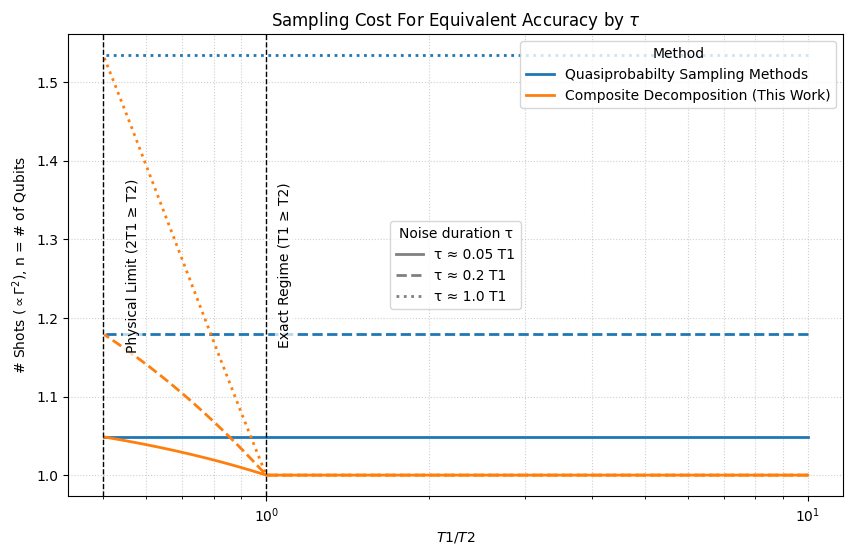

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

T1 = .01
T2 = np.arange(T1/10, 2*T1, T1/100)
taus = [T1/20, T1/5, T1] # T1*peak]
n = 1

p_amp = []
p_phase = []
for tau in taus:
    pa_tau = []
    pp_tau = []
    for t2 in T2:
        pa_tau.append(1-np.exp(-tau/T1))
        pp_tau.append(1-np.exp(-(1/t2 - 1/(2*T1))*tau))
    p_amp.append(pa_tau)
    p_phase.append(pp_tau)


def overhead(q):
    """Calculate overhead Gamma = sum of absolute values."""
    overhead = np.sum(np.abs(q))**n
    return overhead


def generate_pdf(gamma, p):
    c0 = 0.5 * (1.0-gamma+np.sqrt(1.0-gamma))
    c1 = 0.5 * (1.0-gamma-np.sqrt(1.0-gamma))
    c2 = gamma

    c0_tot = (1 - p) * c0 + p * c1
    c1_tot = p * c0 + (1 - p) * c1
    c2_tot = c2

    return np.array([c0, c1, c2]), np.array([c0_tot, c1_tot, c2_tot])


quasi = []
stab = []

for i, tau in enumerate(taus):
    curve1 = []
    curve2 = []
    for gamma, lam in zip(p_amp[i], p_phase[i]):
        q1, q2 = generate_pdf(gamma, lam/2)
        curve1.append(overhead(q1)**2)
        curve2.append(overhead(q2)**2)

    quasi.append(curve1)
    stab.append(curve2)
    

# Plotting
plt.figure(figsize=(10,6))
ax = plt.gca()

# Use color to denote method, linestyle to denote tau
linestyles = ['-', '--', ':', '-.']
colors = {
    'quasi': '#1f77b4',
    'stab':  '#ff7f0e',
}

for i, tau in enumerate(taus):
    ls = linestyles[i % len(linestyles)]
    ax.plot(T1/T2, quasi[i], linestyle=ls, color=colors['quasi'], linewidth=2,
            label='Quasiprobabilty Sampling Methods' if i == 0 else None)
    ax.plot(T1/T2, stab[i], linestyle=ls, color=colors['stab'], linewidth=2,
            label='Composite Decomposition (This Work)' if i == 0 else None)

# Method legend (colors)
method_legend = ax.legend(loc='upper right', title='Method')
ax.add_artist(method_legend)

# Vertical line at T1/T2 = 0.5 with inline label
ax.axvline(x=0.5, color='black', linestyle='--', linewidth=1)
ax.text(
    0.55, 0.5, 'Physical Limit (2T1 ≥ T2)',
    transform=ax.get_xaxis_transform(),  # x in data, y in axes fraction
    rotation=90, va='center', ha='left', color='black',
    bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.7)
)

# Vertical line at T1/T2 = 1 and centered inline label
ax.axvline(x=1, color='black', linestyle='--', linewidth=1)
ax.text(
    1.05, 0.5, 'Exact Regime (T1 ≥ T2)',
    transform=ax.get_xaxis_transform(),
    rotation=90, va='center', ha='left', color='black',
    bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.7)
)

# Tau legend (linestyles)
from matplotlib.lines import Line2D
tau_handles = [
    Line2D([0], [0], color='gray', linestyle=linestyles[i % len(linestyles)], linewidth=2,
           label=rf'τ ≈ {round(taus[i]/T1, 2)} T1')
    for i in range(len(taus))
]
ax.legend(handles=tau_handles, loc='center', title='Noise duration τ')

plt.xlabel(r'$T1/T2$')
plt.xscale('log')
plt.ylabel(r'# Shots ($\propto \Gamma^2$), n = # of Qubits')
plt.title(r'Sampling Cost For Equivalent Accuracy by $\tau$')
plt.grid(True, which='both', linestyle=':', alpha=0.6)
plt.show()

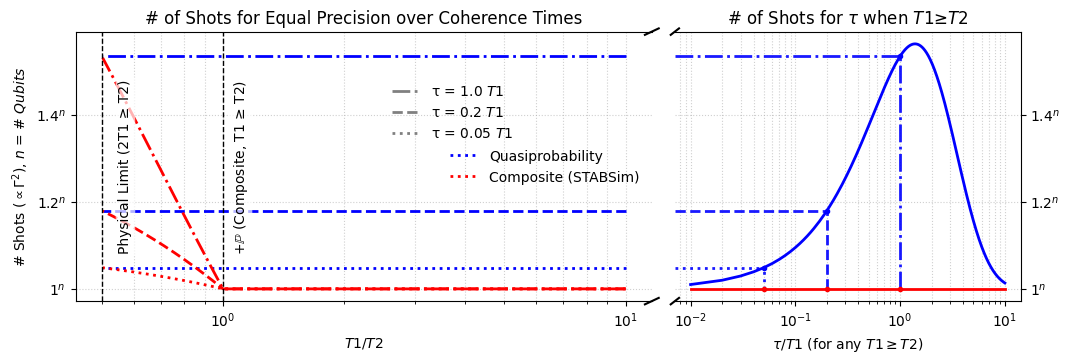

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.patches import ConnectionPatch
from matplotlib import transforms


# Assumes you already computed:
# - T1 (scalar), T2 (array), taus (list), quasi, stab from your last cell
# Build τ/T1 curves for the right panel here (self-contained)
T1_scalar = float(T1 if np.isscalar(T1) else T1[0])
taus_dense = np.arange(T1_scalar/100, 10*T1_scalar, T1_scalar/100)

def overhead(q, n=1):
    return np.sum(np.abs(q))**n
def generate_pdf(gamma, p):
    c0 = 0.5 * (1.0-gamma+np.sqrt(1.0-gamma))
    c1 = 0.5 * (1.0-gamma-np.sqrt(1.0-gamma))
    c2 = gamma
    c0_tot = (1 - p) * c0 + p * c1
    c1_tot = p * c0 + (1 - p) * c1
    c2_tot = c2
    return np.array([c0, c1, c2]), np.array([c0_tot, c1_tot, c2_tot])

curve_quasi_tau = []
curve_stab_tau = []
for tau in taus_dense:
    gamma = 1 - np.exp(-tau/T1_scalar)
    lam = 1 - np.exp(-(1/T1_scalar - 1/(2*T1_scalar))*tau)  # here T2 = T1 for the τ-panel
    q1, q2 = generate_pdf(gamma, lam/2)
    curve_quasi_tau.append(overhead(q1)**2)
    curve_stab_tau.append(overhead(q2)**2)

# Figure with two panels
fig = plt.figure(figsize=(14,3.5))
gs = GridSpec(1, 2, width_ratios=[2.0, 1.2], wspace=0.05)
axL = fig.add_subplot(gs[0])
axR = fig.add_subplot(gs[1], sharey=axL)

# Left: T1/T2 curves (methods by color, τ by linestyle)
linestyles = [ ':', '--', '-.', '-']
colors = {'quasi': "#0000ff", 'stab': "#ff0000"}
for i, tau in enumerate(taus):
    ls = linestyles[i % len(linestyles)]
    axL.plot(T1/T2, quasi[i], linestyle=ls, color=colors['quasi'], linewidth=2,
             label='Quasiprobability' if i == 0 else None)
    axL.plot(T1/T2, stab[i],  linestyle=ls, color=colors['stab'],  linewidth=2,
             label='Composite (STABSim)' if i == 0 else None)
    

# Markers at x=0.5 and x=1
axL.axvline(x=0.5, color='black', linestyle='--', linewidth=1)
axL.text(0.55, 0.5, 'Physical Limit (2T1 ≥ T2)', transform=axL.get_xaxis_transform(),
         rotation=90, va='center', ha='left',
         bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.7))
axL.axvline(x=1, color='black', linestyle='--', linewidth=1)
axL.text(1.05, 0.5, r'+$\mathbb{P}$ (Composite, T1 ≥ T2)', transform=axL.get_xaxis_transform(),
         rotation=90, va='center', ha='left', backgroundcolor='none',
         bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.7))

axL.set_xscale('log')
axL.set_xlabel(r'$T1/T2$')
axL.set_ylabel(r'# Shots ($\propto \Gamma^2$), $n$ = # $Qubits$')
axL.grid(True, which='both', linestyle=':', alpha=0.6)

leg_methods = axL.legend(
    loc='center left',
    bbox_to_anchor=(1.05, 0.5),  # shift right: 1.05 is just beyond the axes
    title='Method',
    frameon=False
)

# Right: τ/T1 curves “expanding from” x=1
axR.plot(taus_dense/T1_scalar, curve_quasi_tau, color=colors['quasi'], linewidth=2)
axR.plot(taus_dense/T1_scalar, curve_stab_tau,  color=colors['stab'],  linewidth=2)
axR.set_xscale('log')
axR.set_xlabel(r'$\tau/T1$ (for any $T1 \geq T2$)')
axR.grid(True, which='both', linestyle=':', alpha=0.6)

# ...existing code...

# Precompute left x-grid and index nearest x=1
x_grid_L = T1 / T2
idx_at_1 = int(np.argmin(np.abs(x_grid_L - 1.0)))

# Get right-panel x-range (after plotting and setting log scale)
xR_min, xR_max = axR.get_xlim()

# Draw right-panel horizontals at y=yL and vertical drops at x=τ/T1
for i, tau in enumerate(taus):
    ls = linestyles[i % len(linestyles)]

    # y on left at x=1 for each method
    yL_quasi = quasi[i][idx_at_1]
    yL_stab  = stab[i][idx_at_1]

    # Right x for this τ and corresponding y on the τ-curves
    xR = float(tau / float(T1 if np.isscalar(T1) else T1[0]))
    j = int(np.argmin(np.abs(taus_dense / float(T1 if np.isscalar(T1) else T1[0]) - xR)))
    yR_quasi = curve_quasi_tau[j]
    yR_stab  = curve_stab_tau[j]

    # Right-panel horizontal from left edge to xR, at y=yL
    for yL, yR, color in [(yL_quasi, yR_quasi, colors['quasi'])]:
        axR.hlines(y=yL, xmin=xR_min, xmax=xR,
                   colors=color, linestyles=ls, linewidth=2, alpha=0.9, zorder=11)

        # Vertical drop at x=xR down/up to the τ-curve
        axR.vlines(x=tau*100, ymin=1, ymax=max(yL, yR),
                   colors=color, linestyles=ls, linewidth=2, alpha=0.9, zorder=12)

    # Mark intersection points on right
    axR.plot([xR], [yR_quasi], marker='o', ms=3, color=colors['quasi'], zorder=13)
    axR.plot([xR], [yR_stab],  marker='o', ms=3, color=colors['stab'],  zorder=13)

# ...existing code...

# Visual “expansion” effect: break marks and connector from x=1 to right panel left edge
axL.spines['right'].set_visible(False)
axR.spines['left'].set_visible(False)
axR.yaxis.tick_right()
axR.tick_params(labelleft=False)

d = 0.012
kwargs = dict(transform=axL.transAxes, color='k', clip_on=False)
axL.plot((1-d, 1+d), (-d, +d), **kwargs)
axL.plot((1-d, 1+d), (1-d, 1+d), **kwargs)
kwargs.update(transform=axR.transAxes)
axR.plot((-d, +d), (-d, +d), **kwargs)
axR.plot((-d, +d), (1-d, 1+d), **kwargs)

# Method legend (color) - anchor outside to the right
leg_methods = axL.legend(
    loc='center right',
    # bbox_to_anchor=(0,.1),  # push further right so it's outside the plot but inside figure
    frameon=False
)

# τ legend (linestyles) - keep inside plot area
from matplotlib.lines import Line2D
tau_handles = [
    Line2D([0], [0], color='gray', linestyle=linestyles[i % len(linestyles)], linewidth=2,
           label=rf'τ = {round(taus[i]/T1_scalar, 2)} $T1$')
    for i in range(len(taus))
]
leg_tau = axL.legend(
    handles=list(reversed(tau_handles)),
    loc='lower center',
    bbox_to_anchor=(.655, .55),
    frameon=False,
)

# Add the Method legend back so both show
axL.add_artist(leg_methods)
axL.yaxis.set_major_formatter(ticker.FuncFormatter(lambda v, pos: rf'{v:g}$^n$'))
axL.set_title(r'# of Shots for Equal Precision over Coherence Times')
axR.set_title(r'# of Shots for $\tau$ when $T1 ≥ T2$')
fig.subplots_adjust(right=0.8)

plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'figure.dpi': 500})  # Set font size for the entire figure



# fig.suptitle('Sampling Cost: T1/T2 (left) with expansion from Exact Regime into τ/T1 (right)')
plt.savefig('sampling_cost_analysis.pdf', dpi=500, bbox_inches='tight')
